In [ ]:
filename = r"..\test"
with open(filename,"r") as f:
    raw = f.read().splitlines()

In [176]:
from itertools import combinations
data = list(map(lambda i: tuple(map(int,i.split(","))),raw))
dist = lambda a,b: max(a,b)-min(a,b)+1
area = lambda a,b: dist(a[0],b[0])*dist(a[1],b[1])
s = max(area(i,j) for i,j in combinations(data,2))
print(f"Solution 1: {s}")

Solution 1: 4744899849


In [177]:
data = list(map(lambda i: tuple(map(int,i.split(","))),raw))
prev = data[0]
extents = []
for point in data[1:]:
    if point[1] != prev[1]:
        prev = point
        continue
    extents.append((min(point[0],prev[0]),max(point[0],prev[0]),point[1]))

In [167]:
crossers = lambda c: [i for i in extents if i[2]<=c[1] and i[0]<c[0] and i[1]>c[0]]
contained = lambda c:len(crossers(c))%2==1


In [ ]:
import shapely
vp = lambda c1,c2: (c1[0],c2[1])
p = shapely.Polygon(data)
c1,c2,s = max([(i,j,area(i,j)) for i,j in combinations(data,2) if p.contains(shapely.box(*i,*j))],key=lambda i: i[2])
print(f"Solution 2: {s}")

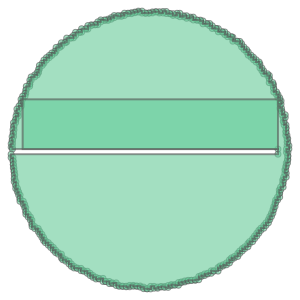

In [182]:
shapely.GeometryCollection([shapely.MultiPoint(data),shapely.Polygon(data),shapely.box(*c1,*c2)])